# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
validation_file= '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p'
testing_file = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [202]:
print (X_train.shape)
print (y_train.shape)
print (X_valid.shape)
print (y_valid.shape)
print (X_test.shape)
print (y_test.shape)



(62156, 32, 32, 1)
(62156,)
(4410, 32, 32, 1)
(4410,)
(12630, 32, 32, 1)
(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
unique_train, counts_train = np.unique(y_train, return_counts=True)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print (unique_train,counts_train)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


As we can see above:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is 32 x 32 x 3
* The number of unique classes/labels in the data set is 43

Also, the frequency of each class is printed. We can clearly see that class 0 has 180 images(lowest) and class 2 has 2010 images(highest

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Here is an exploratory visualization of the data set. It is a bar chart showing how the data are distributed in different classes.

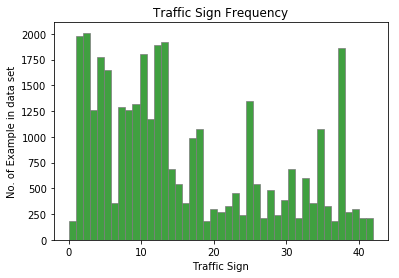

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train,bins=43,histtype='bar',alpha=0.75,facecolor='green', edgecolor='gray')
plt.title("Traffic Sign Frequency")
plt.xlabel("Traffic Sign")
plt.ylabel("No. of Example in data set")


plt.show()

From above graph it is clear that the data is unbalanced. Some classes have very few examples than other. So, I will use **Data Augmentation** technique to increase examples

Following block of code is to print some random images from the training dataset with related label.

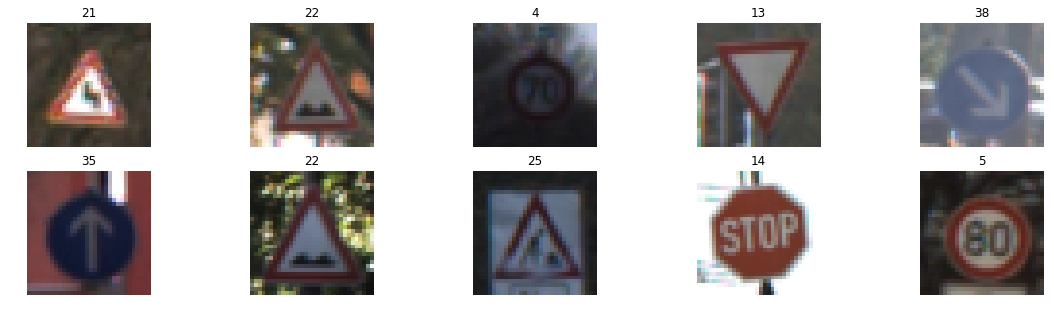

In [5]:
import random
fig,axs = plt.subplots(2,5,figsize=(20,5))
fig.subplots_adjust(hspace = .2,wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = random.randint(0,len(X_train))
    img = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(img)
    axs[i].set_title(y_train[index])
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

At first step, I decided to keep RGB color as it is. But then I realized that the color channel won't help to increase the accuracy of model or will enhance the model and grayscale will be okay. Also by converting to grayscale, we can reduce the training time. (Less channel --> less memory consumption --> Fast training). 

To check I have tried following input data option
1. RGB images
2. Only Grayscale images
3. RGB + Grayscale images (First converted to Grayscale then concatenated RGB and grayscale to make input aa a four channel data)

Finally, I decided to go with the grayscale only.

In [203]:
import cv2

#Normalization of an image. Converted all the data points in the range [-0.5,0.5].
#Normalization is necessary to ensure that all features will have equal contribution and the algorithm can converge
#fast.
def normalize(data):
    #data_mean = np.mean(data)
    #data_std = np.std(data)
    #new_data = (data - data_mean) / data_std
    print (len(data))
    new_data = np.array(data/255.0 - 0.5)
    return new_data

#def rgb2gray(data):
    
#    gray_images = np.zeros(shape=(len(data),32,32))
#
#
#    for i in range(0,len(data)):
#        gray_image[i] = cv2.cvtColor(data[i],cv2.COLOR_RGB2GRAY)


#Concept to Convert an RGB image to grayscale

#r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

def rgb2gray(data):
    gray = np.dot(data[...,:3],[0.299,0.587,0.114])
    return gray
    

As shown above, there are two ways to convert RGB to Grayscale image. Numpys' `dot` method is faster than OpenCV `cvtColor` method.

In [ ]:
#Grayscale conversion
X_train_gray = rgb2gray(X_train)
X_valid_gray = rgb2gray(X_valid)
X_test_gray = rgb2gray(X_test)

X_train = normalize(X_train_gray)
X_valid = normalize(X_valid_gray)
X_test = normalize(X_test_gray)

In [ ]:
print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)

In [212]:
X_train = np.reshape(X_train,[-1,32,32,1])
X_valid = np.reshape(X_valid,[-1,32,32,1])
X_test = np.reshape(X_test,[-1,32,32,1])
print (X_train.mean())
print ((X_train < -0.5).any())
print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)

-0.170308977613
False
(62156, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


Above block converts the X_train,X_valid and X_test from 32x32 to 32x32x1 data. Also, we can confirm that the X_train data is now normalized i.e. mean value is -0.17(~0) and no values are < -0.5 or > 0.5

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

Following block includes different functions for **Data Augmentation**. 
I have written following functions (Not used all!)
1. Resizing an image
2. Translation
3. Rotation of an image(15 degree)
4. Affine Transformation
5. Average Convolution
6. Blurring
7. Gaussian Blurring
8. Median Blurring
9. Erosion
10. Dilation

**NOTE** : The most common Data Augmentation technique is Vertical and Horizontal conversion of an image but our dataset contains some mirror images(like Right turn, left turn etc. ) and to convert images to vertical/horizontal(90 degree) is not a good idea. So I have used minor angle (15 degree) for rotation.

In [11]:
#Make size of an image to 32x32. This is already done for our dataset so not required.
def resized(img):
    res = cv2.resize(img,(32, 32), interpolation = cv2.INTER_AREA)
    return res

#Traslation. Done using translation matrix. Will perform 5x5 pixel translation

def translation(img):
    rows,cols,channel = img.shape
    M = np.float32([[1,0,5],[0,1,5]])
    #Third argument of the cv2.warpAffine() function is the size of the output image, 
    #which should be in the form of (width, height). 
    #Remember width = number of columns, and height = number of rows.
    trans = cv2.warpAffine(img,M,(cols,rows))
    return trans

def rotation_minor(img):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
    rot = cv2.warpAffine(img,M,(cols,rows))
    return rot

def affine_transform(img):
    rows,cols,channel = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pts2 = np.float32([[1,10],[20,5],[10,25]])

    M = cv2.getAffineTransform(pts1,pts2)

    aff = cv2.warpAffine(img,M,(cols,rows))
    return aff

#Smoothing Techniques
def average_convolution(img):
    kernel = np.ones((5,5),np.float32)/25
    avg = cv2.filter2D(img,-1,kernel)
    return avg

def bluring(img):
    blur = cv2.blur(img,(5,5))
    return blur

def gaussian_bluring(img):
    gauss_blur = cv2.GaussianBlur(img,(5,5),0)
    return gauss_blur

def median_bluring(img):
    median_blur = cv2.medianBlur(img,5)
    return median_blur

#Erosion and Dilation
def erosion(img):
    kernel = np.ones((5,5),np.float32)
    img_erosion = cv2.erode(img, kernel, iterations=1)
    return img_erosion

def dilation(img):
    kernel = np.ones((5,5),np.float32)
    img_dilation = cv2.dilate(img, kernel, iterations=1)
    return img_dilation




In [12]:
print (np.bincount(y_train))
print (y_train[0:200])
X_train_copy = X_train
y_train_copy = y_train

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41]


Following is the logic to create augmented data with their labels and concatenate these new data to dataframe. This is the time consuming task as I find some difficulties to come with the logic. There should be some fast logic as this block takes around 30 minutes to create ~30000 images. Not sure if it is okay or not!!

In [13]:
new_image_list = []
for nClass in range(n_classes):
    #print (nClass)
    class_index = np.where(y_train == nClass)
    #print (class_index)
    total_samples = len(class_index[0])
    #print (total_samples)
    if total_samples < 800:
        for i in range(total_samples):
            
            #print (class_index[0][i])
            #print ("-------")
            #print (X_train[class_index[0][i]],y_train[class_index[0][i]])
            new_img = affine_transform(X_train[class_index[0][i]])
            new_img2 = rotation_minor(X_train[class_index[0][i]])
            new_img3 = gaussian_bluring(X_train[class_index[0][i]])
            
            #print (new_img.shape)
            
            #print (new_img2.shape)
            #print (new_img3.shape)
            
            #print (X_train_copy.shape)
            new_img = np.reshape(new_img,[-1,32,32,1])
            new_img2 = np.reshape(new_img2,[-1,32,32,1])
            new_img3 = np.reshape(new_img3,[-1,32,32,1])
            
            #print (new_img.shape)
            #print (new_img2.shape)
            #print (new_img3.shape)
            
            
            #print (y_train_copy.shape)
            #y_index_this_class = 
            X_train_copy = np.concatenate((X_train_copy, new_img), axis=0)
            y_train_copy = np.concatenate((y_train_copy,[nClass]),axis=0)
            X_train_copy = np.concatenate((X_train_copy, new_img2), axis=0)
            y_train_copy = np.concatenate((y_train_copy,[nClass]),axis=0)
            X_train_copy = np.concatenate((X_train_copy, new_img3), axis=0)
            y_train_copy = np.concatenate((y_train_copy,[nClass]),axis=0)
            
            

print (X_train_copy.shape)
print (y_train_copy.shape)
        
        


(62156, 32, 32, 1)
(62156,)


In [ ]:
print (np.bincount(y_train_copy))

In [ ]:
for nClass in range(1):
    #print (nClass)
    class_index = np.where(y_train_copy == nClass)
    #print (class_index)
    total_samples = len(class_index[0])
    #print (total_samples)
    if total_samples < 1000:
        print ((class_index[0]))



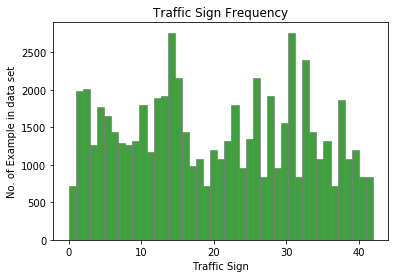

In [14]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train_copy,bins=43,histtype='bar',alpha=0.75,facecolor='green', edgecolor='gray')
plt.title("Traffic Sign Frequency")
plt.xlabel("Traffic Sign")
plt.ylabel("No. of Example in data set")


plt.show()

Above graphs shows that now each class has at least 500 images. Total examples are now 62156.

42


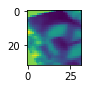

In [39]:
import random
index = random.randint(0, len(X_train_copy))
image = X_train_copy[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_copy[index])

In [49]:
X_train = X_train_copy
y_train = y_train_copy

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [50]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 64

**Following is my architecture to solve this problem. 
First I tried with the same LeNet architecture with some hyperparameter tuning and I was getting ~93 % accuracy on Validation dataset.
To increase the accuracy I increased the convolution layer and played with filter (increase filters) and was able to get more accuracy on validation set. ( I did not track or save the log as I learned this afterwords!)**

**Finally, I decided to go with the little advance than LeNet that is VGGNet. My architecture is based and derived from the VGGNet. I have used six convolution network and applied Max Pooling on alternate layers.**

My complete architecture in tabular form is as follow:


| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Convolution 3x3     	| 1x1 stride, same padding, outputs 32x32x32 	|
| RELU					|												|
| Convolution 3x3	    | Input 32x32x32,  outputs 32x32x32 			|
| RELU                  |                                               |
| Max Pooling	    	| Input 32x32x32,  outputs 16x16x32      		|
| Convolution 3x3     	| 1x1 stride, same padding, outputs 16x16x64 	|
| RELU					|												|
| Convolution 3x3	    | Input 16x16x64,  outputs 16x16x64 			|
| RELU                  |                                               |
| Max Pooling	    	| Input 16x16x64,  outputs 8x8x64      		    |
| Convolution 3x3     	| 1x1 stride, same padding, outputs 8x8x128 	|
| RELU					|												|
| Convolution 3x3	    | Input 8x8x128,  outputs 8x8x128 			    |
| RELU                  |                                               |
| Max Pooling	    	| Input 8x8x128,  outputs 4x4x128      		    |
| Flatten               | Input 4x4x128,  output 2048                   |
| Fully connected		| Input 2048, output 120        			    |
| RELU				    |         									    |
| Dropout			    |												|
| Fully connected		| Input 120, output 120        			        |
| RELU				    |         									    |
| Dropout			    |												|
|						|												|


In [56]:
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 32x32x32. Output = 32x32x32.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # SOLUTION: Layer 2: Convolutional. Input = 32x32x32 Output = 32x32x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 32x32x32. Output = 16x16x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = tf.nn.dropout(conv2,keep_prob)
    # SOLUTION: Layer 3: Convolutional. Input = 16x16x32 Output = 16x16x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 16x16x64. Output = 16x16x64.
    #conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Pooling. Input = 16x16x64. Output = 8x8x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv4 = tf.nn.dropout(conv4,keep_prob)

    # SOLUTION: Layer 5: Convolutional. Input = 8x8x64 Output = 8x8x128.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)
    
    
    # SOLUTION: Layer 6: Convolutional. Input = 8x8x128 Output = 8x8x128.
    
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6)
    
    # SOLUTION: Pooling. Input = 8x8x128. Output = 4x4x128.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv6 = tf.nn.dropout(conv6,keep_prob)


    

    # SOLUTION: Flatten. Input = 4x4x128. Output = 2048.
    fc0   = flatten(conv6)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 2048. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [57]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [58]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [59]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

To train the model, I used following parameters (After hundreds of tweaks!!!)
* Batch Size = 64
* Learning rate = 0.0009
* Epochs = 30
* mu = 0
* sigma = 0.1
* dropout keep prob = 0.6


In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [60]:
from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.6})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.446

EPOCH 2 ...
Validation Accuracy = 0.800

EPOCH 3 ...
Validation Accuracy = 0.897

EPOCH 4 ...
Validation Accuracy = 0.935

EPOCH 5 ...
Validation Accuracy = 0.940

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.983

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.979

EPOCH 13 ...
Validation Accuracy = 0.984

EPOCH 14 ...
Validation Accuracy = 0.984

EPOCH 15 ...
Validation Accuracy = 0.980

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.974

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.987

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.984

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

In [61]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.970


### Test Accuracy is 97.0%

For 30 Epochs, I am getting validation accuracy is around 98.8%. I still believe that I can get more accuracy by tweaking hyperparameters. 

Observation:
In the normal LeNet architecture I was getting low validation and low test accuracy which was an indication of an UNDERFITTING. To avoid this problem, I decided to increase one convolution layer in it. But it was not helping me more. So, I decided to move on little bit complex model VGGNet and added some changes to basic VGGNet version to avoid OVERFITTING problem. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

Following block read images from directory and show them using Matplotlib.

**NOTE** - I was getting errors due to `ds.store` hidden files in MAC. So added condition to check if file is jpg or jpeg.
I learnt how to show more than one images with proper formatting in a single Jupyter cell using Matplotlib.

6


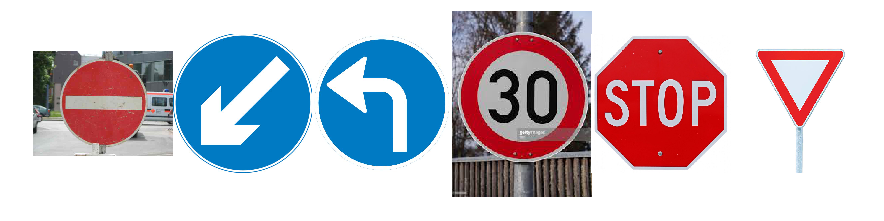

In [186]:

fig,axs = plt.subplots(1,6,figsize=(15,6))
fig.subplots_adjust(hspace = .2,wspace=.001)
axs = axs.ravel()

directory = '/Users/kathan/udacity/Term-1/CarND-Term1-Starter-Kit/TensorFlow/CarND-Traffic-Sign-Classifier-Project/sample_dataset/traffic'

lst = os.listdir(directory) # dir is your directory path
number_files = len(lst)
print (number_files)
new_test_img = np.zeros((number_files,32,32,3),dtype = np.float64)
new_test_img_list = []
for index,filename in enumerate(os.listdir(directory)):
    
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        input_path = os.path.join(directory, filename)
        
        img = plt.imread(input_path)
        axs[index].axis('off')
        axs[index].imshow(img)
        #axs[i].set_title(y_train[i])
        img = resized(img)
        new_test_img[index] = img
        new_test_img_list.append(img)
        

        

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [217]:
#X_train_gray = np.zeros(shape=(len(X_train),32,32))
#print (X_train.shape)
print (new_test_img.shape)

test_gray_img = rgb2gray(new_test_img)


print (test_gray_img.shape)

test_norm_img = normalize(test_gray_img)
test_norm_img = np.reshape(test_norm_img,[-1,32,32,1])
#test_data_final = np.concatenate((data, test_data_gray), axis=3)

#print (test_data_final.shape)

#test_data = test_data_final



print(test_norm_img.shape)





(6, 32, 32, 3)
(6, 32, 32)
6
(6, 32, 32, 1)


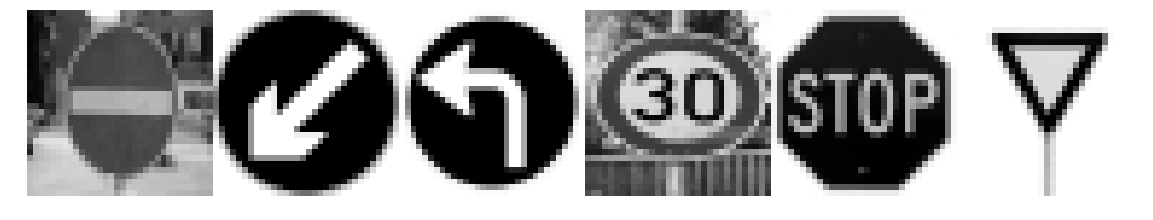

In [219]:
import random
fig,axs = plt.subplots(1,6,figsize=(20,5))
fig.subplots_adjust(hspace = .2,wspace=.001)
axs = axs.ravel()

for i in range(6):
    index = random.randint(0,len(test_norm_img))
    img = test_norm_img[i].squeeze()
    axs[i].axis('off')
    axs[i].imshow(img)
    #axs[i].set_title(y_train[index])
    

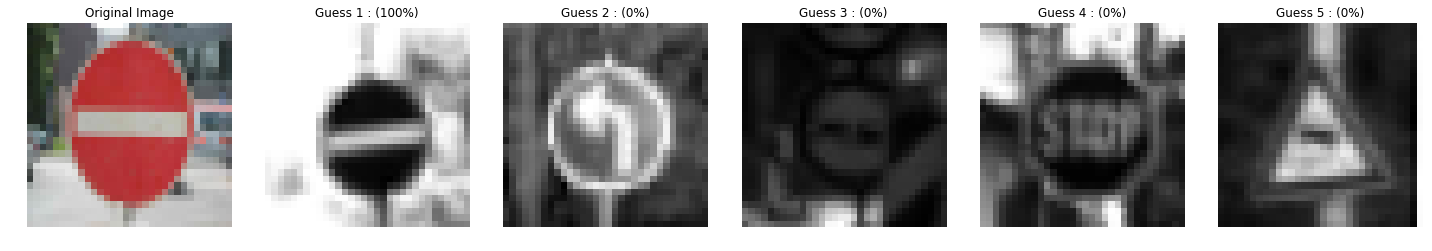

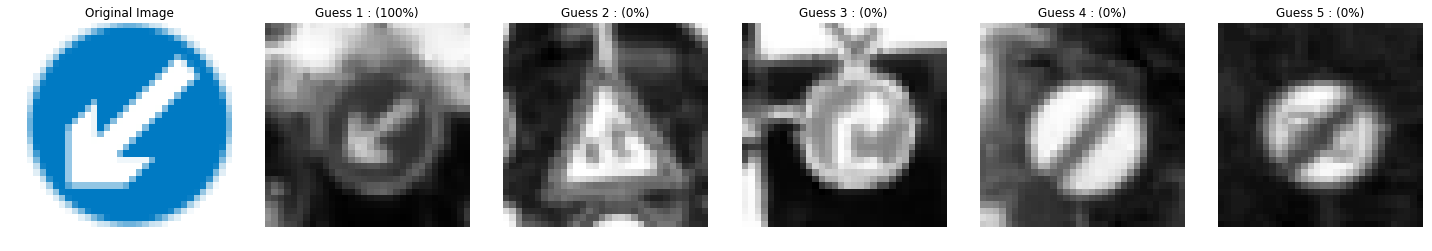

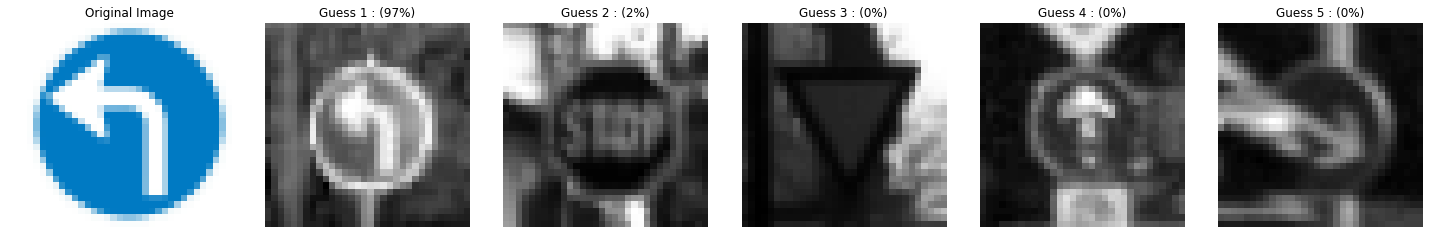

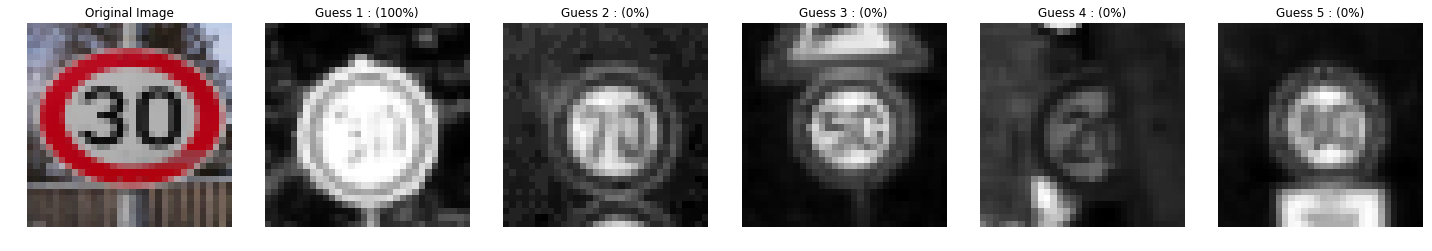

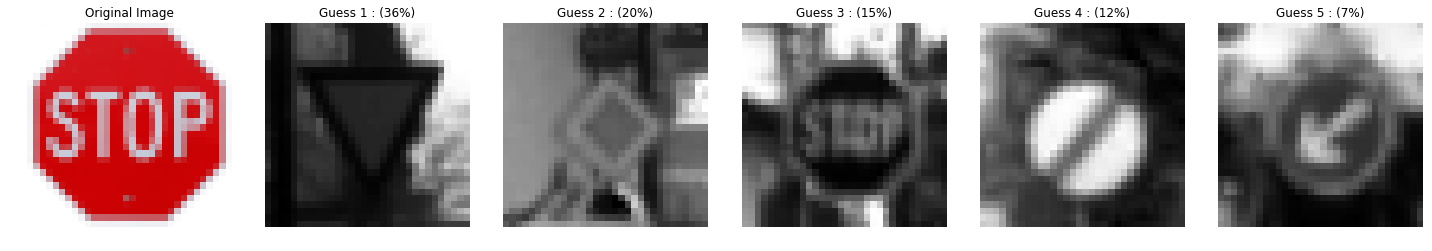

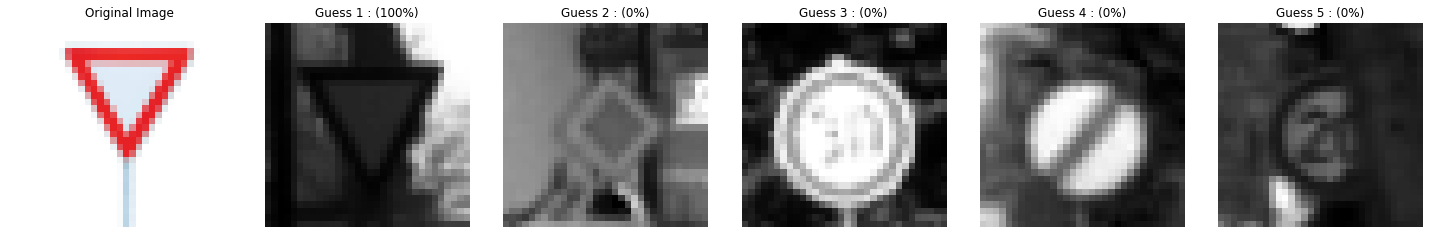

In [194]:
#Following block loops through the length of test_norm_img.
#First, it will store original image in 0th element of `images` dictionary with 'original' label
#After that for it will store next 5 images (same as top k) and store them in images dictionary. 
#And then print images

for i in range(len(test_norm_img)):
    images = {}
    labels = {}
    images[0] = new_test_img_list[i]
    labels[0] = "Original Image"
    
    for j in range(top_k_size):
        #Working of top_k function is explaied below block.
        #0th array of top_k output provides the nearest(Maximum) percentage.
        #So, to get guess,we multiplied with 100.
        labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*top_k_out[0][i][j])
        #1st array gives indices of nearest images.
        images[j+1] = X_valid[np.argwhere(y_valid == top_k_out[1][i][j])[0]].squeeze()
        
    #print (images)
    fig,axs = plt.subplots(1,6,figsize=(20,6))
    fig.subplots_adjust(hspace = .2,wspace=.001)
    axs = axs.ravel()


    for index,title in zip(range(len(images)),images):
        #print (index,title)
        img = images[title]
        #plt.imread(img)
        #plt.imshow(img)
        axs[index].axis('off')
        axs[index].imshow(img,plt.gray())
        axs[index].set_title(labels[index])
    plt.tight_layout()

    



Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| No Entry      		| No Entry   									| 
| Keep Left     		| Keep Left										|
| Left Turn             | Left Turn                                     |
| 30 km/h				| 30 km/h										|
| Stop      	        | Yield					 				        |
| Yield		            | Yield     							        |



I was expecting my model to get failed on some difficult images (Speed) and 'No entry' images, but it detected Stop sign as a Yield sign. I am still not sure what goes wrong here. May be due to some unknown noise in image from web. (Not sure though!!)

### Analyze Performance

In [201]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#Pecentage of correct prediction

test_data_labels = np.array([17,39,34,1,14,13])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy_new = evaluate(test_norm_img,test_data_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy_new))
    
    

My Data Set Accuracy = 0.833


So the overall data set accuracy on new test data set in around 83%.
The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of ~80%.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [199]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_k_size = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_of_logits = tf.nn.softmax(logits)
    topk = tf.nn.top_k(softmax_of_logits,k=top_k_size)


    softmax_logits = sess.run(softmax_of_logits,feed_dict={x:test_norm_img,keep_prob:1.0})
    top_k_out = sess.run(topk,feed_dict={x:test_norm_img,keep_prob:1.0})
    print (top_k_out)
    
    




TopKV2(values=array([[  1.00000000e+00,   6.64796316e-14,   6.82092000e-15,
          2.35829672e-17,   7.17940577e-18],
       [  1.00000000e+00,   2.33577170e-16,   1.78488784e-18,
          1.62877105e-18,   5.79770891e-20],
       [  9.74283576e-01,   1.76749192e-02,   3.38390027e-03,
          1.33332307e-03,   6.75366377e-04],
       [  9.99999762e-01,   2.66558118e-07,   3.36285533e-09,
          1.87376470e-09,   6.62064847e-12],
       [  3.57310802e-01,   1.97509989e-01,   1.47624552e-01,
          1.21949971e-01,   6.59848824e-02],
       [  1.00000000e+00,   1.64270709e-30,   1.78235095e-32,
          1.53969777e-32,   8.42352594e-35]], dtype=float32), indices=array([[17, 34,  9, 14, 23],
       [39, 28, 33, 32,  6],
       [34, 14, 13, 35, 38],
       [ 1,  4,  2,  0,  5],
       [13, 12, 14, 32, 39],
       [13, 12,  1, 32,  0]], dtype=int32))


In [200]:
for i in range(len(test_norm_img)):
    print (100 * top_k_out[0][i][0])

100.0
100.0
97.4283576012
99.9999761581
35.7310801744
100.0


For the first image, the model is relatively sure that this is a No Entry sing (probability of 1), and the image does contain a No entry sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| No Entry sign   								| 
| 1.0     				| Keep Left										|
| .97					| Left Turn										|
| .99	      			| 30 km/h					 				    |
| .35				    | Yield      							        |
| 1.0				    | Yield      							        |

So the model predicts all the sign with more than 97% surety except fifth image (Stop sign). For this sign the top five softmax probabilities are `[  3.57310802e-01,   1.97509989e-01,   1.47624552e-01,1.21949971e-01,6.59848824e-02]`
So the model predicts 35% for Yield, 19% for priority and 15% for Stop sign (The correct one is at 3rd rank!!!)



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")